In [1]:
import matplotlib.pyplot as plt
import sarracen as src
import numpy as np

# Initial Setup

In [2]:
sdf = src.read_csv('../Data/results/sedov_blast_wave/initial.csv')
sdf.params={'mass':0.001}
sdf

,x,y,vx,vy,u,h,rho
0,-0.500000,-0.500000,0,0,0.0,0.063246,1
1,-0.468377,-0.500000,0,0,0.0,0.063246,1
2,-0.436754,-0.500000,0,0,0.0,0.063246,1
3,-0.405132,-0.500000,0,0,0.0,0.063246,1
4,-0.373509,-0.500000,0,0,0.0,0.063246,1
...,...,...,...,...,...,...,...
956,0.322192,0.448683,0,0,0.0,0.063246,1
957,0.353815,0.448683,0,0,0.0,0.063246,1
958,0.385438,0.448683,0,0,0.0,0.063246,1
959,0.417061,0.448683,0,0,0.0,0.063246,1


<Axes: xlabel='x', ylabel='y'>

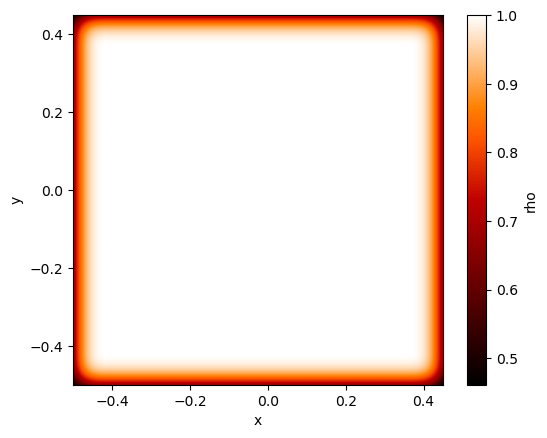

In [3]:
sdf.render('rho', xsec=1.0)

# Final Setup

In [4]:
sdft = src.read_csv('../Data/results/sedov_blast_wave/final.csv')
sdft.params={'mass':0.001}
sdft

,x,y,vx,vy,u,h,rho
0,-0.500000,-0.500000,-0.0,-0.0,0.0,0.054350,0.507274
1,-0.468377,-0.500000,-0.0,-0.0,0.0,0.044411,0.759718
2,-0.436754,-0.500000,-0.0,-0.0,0.0,0.043884,0.778087
3,-0.405132,-0.500000,-0.0,-0.0,0.0,0.043884,0.778087
4,-0.373509,-0.500000,-0.0,-0.0,0.0,0.043884,0.778087
...,...,...,...,...,...,...,...
956,0.322192,0.448683,0.0,0.0,0.0,0.043884,0.778087
957,0.353815,0.448683,0.0,0.0,0.0,0.043884,0.778087
958,0.385438,0.448683,0.0,0.0,0.0,0.043884,0.778087
959,0.417061,0.448683,0.0,0.0,0.0,0.044411,0.759718


<Axes: xlabel='x', ylabel='y'>

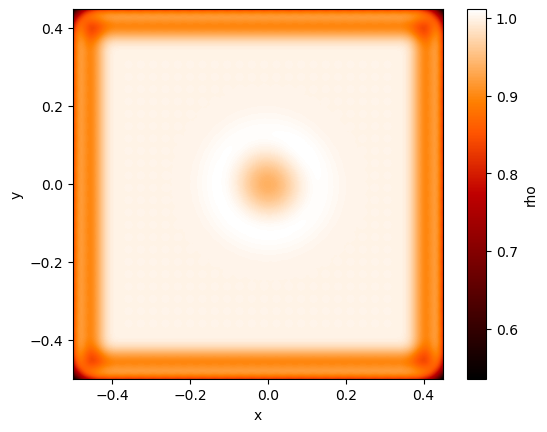

In [5]:
sdft.render('rho', xsec=1.0)

# Angular Momentum's Conservation

In [6]:
# Angular Momentum
def angular_momentum(x, y, vx, vy):
    return x*vy - y*vx

In [7]:
T = 6
time = range(0, T)
ang_mom = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/sedov_blast_wave/' + str(ii) + ".csv")
    df.params={'mass': 2.0/df.shape[0]}
    ang_mom[ii-1] = np.sum(angular_momentum(df['x'], df['y'], df['vx'], df['vy']))

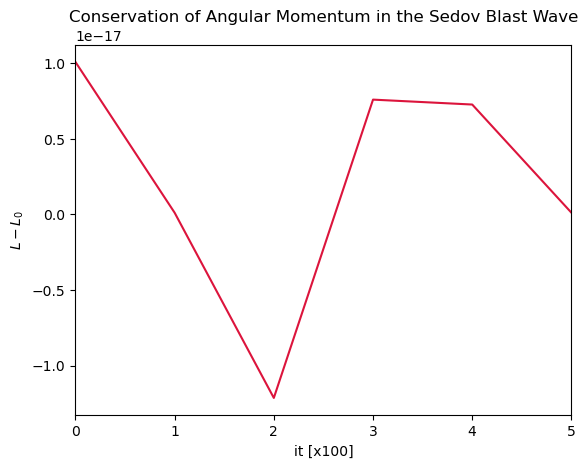

In [8]:
plt.plot(time[:], ang_mom[:], '-', color='crimson')
plt.title("Conservation of Angular Momentum in the Sedov Blast Wave")
plt.xlabel("it [x100]")
plt.ylabel("$L-L_0$")
plt.xlim(0, T-1)
plt.show()

# Conservation of Energy

In [9]:
# Energy
def energy(vx, vy, u):
    return 0.5*(vx*vx + vy*vy)+u

In [10]:
energ = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/sedov_blast_wave/' + str(ii) + ".csv")
    energ[ii-1] = np.sum(energy(df['vx'], df['vy'], df['u']))

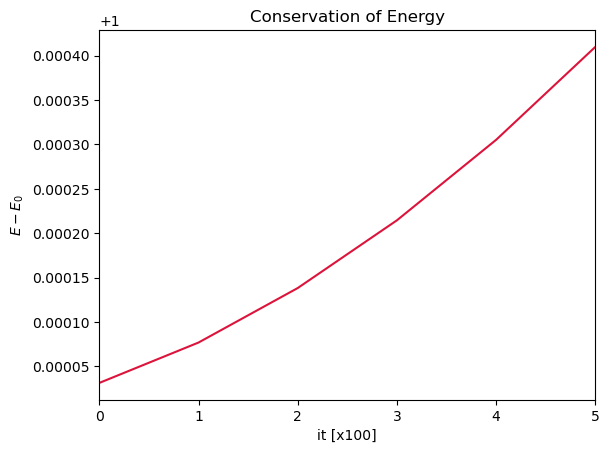

In [11]:
plt.plot(time[:], energ[:], '-', color='crimson')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel("$E-E_0$")
plt.xlim(0, T-1)
plt.show()

# Density distribution

In [12]:
rad = np.sqrt(sdft["x"]**2 + sdft["y"]**2)
rho = sdft["rho"]
len(rad)

961

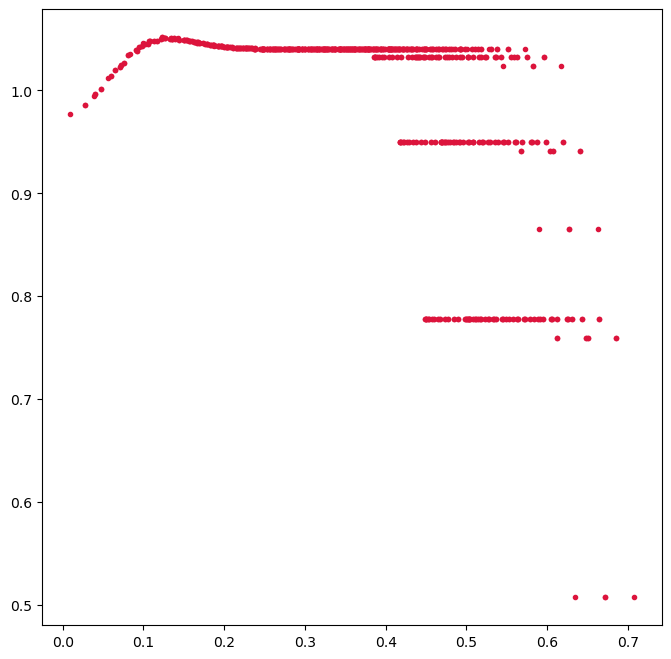

In [13]:
fig = plt.figure(figsize=(8,8))
plt.plot(rad, rho, ".", color="crimson")
plt.show()